<a href="https://colab.research.google.com/github/VinayMalyala/Machine-Learning-Project/blob/main/Python_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("/content/bottle1.csv")

In [ ]:
print(df)

     Cst_Cnt  Btl_Cnt       Sta_ID                                Depth_ID  \
0          1        1  054.0 056.0  19-4903CR-HY-060-0930-05400560-0000A-3   
1          1        2  054.0 056.0  19-4903CR-HY-060-0930-05400560-0008A-3   
2          1        3  054.0 056.0  19-4903CR-HY-060-0930-05400560-0010A-7   
3          1        4  054.0 056.0  19-4903CR-HY-060-0930-05400560-0019A-3   
4          1        5  054.0 056.0  19-4903CR-HY-060-0930-05400560-0020A-7   
..       ...      ...          ...                                     ...   
994       33      995  092.0 088.0  19-4903NS-HY-061-0906-09200880-0286A-3   
995       33      996  092.0 088.0  19-4903NS-HY-061-0906-09200880-0300A-7   
996       33      997  092.0 088.0  19-4903NS-HY-061-0906-09200880-0379A-3   
997       33      998  092.0 088.0  19-4903NS-HY-061-0906-09200880-0400A-7   
998       33      999  092.0 088.0  19-4903NS-HY-061-0906-09200880-0500A-7   

     Depthm  T_degC  Salnty  O2ml_L  STheta  O2Sat  ...  R_PHAE

In [ ]:
df_bin = df[['Salnty', 'T_degC']]
df_bin

,Salnty,T_degC
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45
...,...,...
994,34.040,7.36
995,34.040,7.22
996,34.040,6.58
997,34.049,6.44


In [ ]:
df_bin.columns = ['Sal', 'Temp']
df_bin

,Sal,Temp
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45
...,...,...
994,34.040,7.36
995,34.040,7.22
996,34.040,6.58
997,34.049,6.44


In [ ]:
df_bin.head()

,Sal,Temp
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


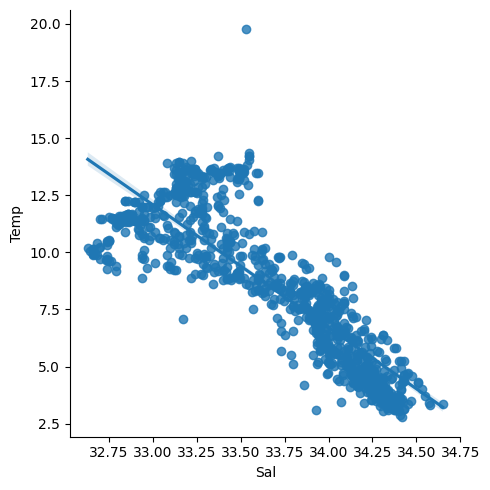

In [ ]:
sns.lmplot(x="Sal", y="Temp", data=df_bin)

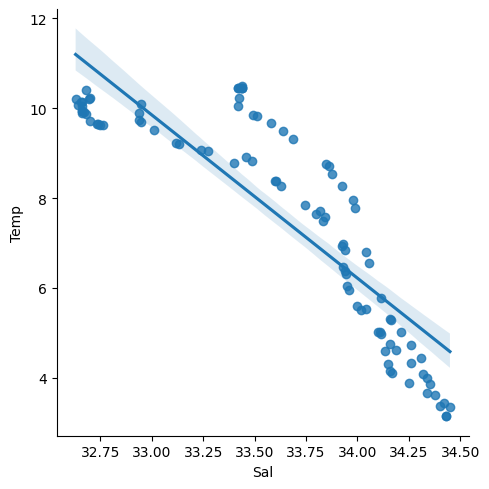

In [ ]:
sns.lmplot(x="Sal", y="Temp", data=df_bin.head(100))

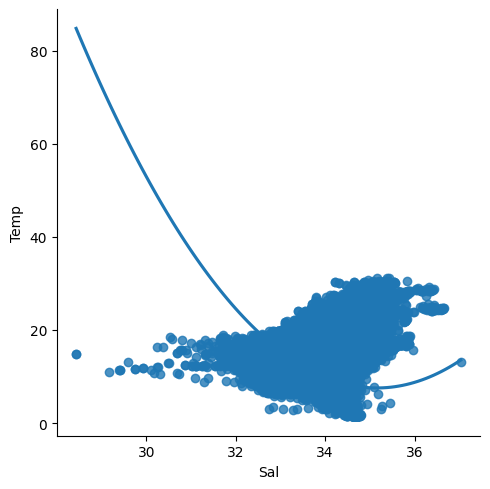

In [ ]:
sns.lmplot(x="Sal", y="Temp", data=df_bin, order=2, ci=None)

In [ ]:
df_bin.fillna(method="ffill", inplace=True)
df_bin.dropna(inplace=True)

<ipython-input-25-a5ef1bbe111f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin.fillna(method="ffill", inplace=True)
<ipython-input-25-a5ef1bbe111f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin.dropna(inplace=True)


In [ ]:
X = np.array(df_bin['Sal']).reshape(-1, 1)
Y = np.array(df_bin['Temp']).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))

0.7304044964566335


In [ ]:
df_bin_500 = df_bin[:][:500]
df_bin_500

,Sal,Temp
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45
...,...,...
495,34.269,4.90
496,34.310,4.50
497,34.311,4.48
498,34.319,4.21


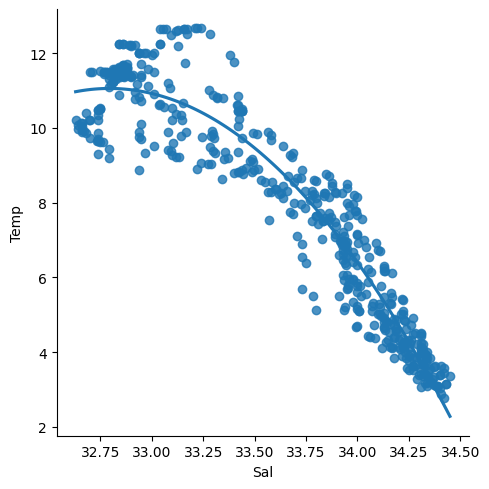

In [ ]:
sns.lmplot(x="Sal", y="Temp", data=df_bin_500, order=2, ci=None)

In [ ]:
df_bin_500.fillna(method="ffill", inplace=True)
df_bin_500.dropna(inplace=True)

In [ ]:
X = np.array(df_bin_500['Sal']).reshape(-1, 1)
Y = np.array(df_bin_500['Temp']).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))

0.8489504445047323


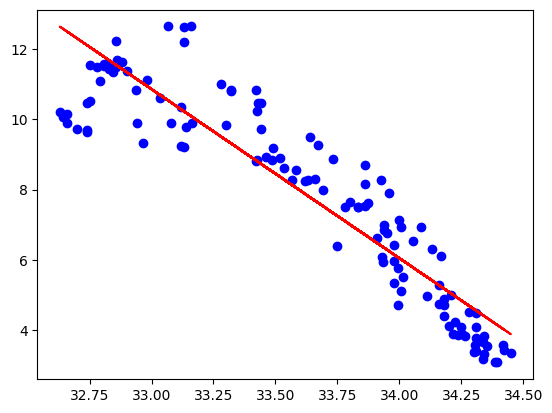

In [ ]:
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test, color='b')
plt.plot(X_test, y_pred, color='r')
plt.show()